# RNA-Seq Read Counts

**Created**: 11 January 2022

## Environment

In [1]:
if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

Loading required namespace: patchwork



In [2]:
library(tidyverse)
library(data.table)
library(patchwork)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## Load Data

In [3]:
sample.info <- read.csv("03_Functional_Interpretation/metadata/reads_rna_seq.txt")

In [4]:
head(sample.info)

,Run,Group.ID,Sample.ID,Donor,Lineage,Cell_type,Stimulated,Treatment,Replicate,Assay.Type,⋯,Instrument,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,Sample.Name,source_name,SRA.Study
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR2753094,Corces-5852-Monocytes-Control,Corces-5852-Monocytes-Control-1,Corces-5852,MYELOID,Monocytes,FALSE,Control,1,RNA-Seq,⋯,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1915599,Mono,SRP065216
2,SRR2753100,Corces-6792-Monocytes-Control,Corces-6792-Monocytes-Control-1,Corces-6792,MYELOID,Monocytes,FALSE,Control,1,RNA-Seq,⋯,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1915605,Mono,SRP065216
3,SRR2753109,Corces-7256-Monocytes-Control,Corces-7256-Monocytes-Control-1,Corces-7256,MYELOID,Monocytes,FALSE,Control,1,RNA-Seq,⋯,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1915614,Mono,SRP065216
4,SRR2753119,Corces-7653-Monocytes-Control,Corces-7653-Monocytes-Control-1,Corces-7653,MYELOID,Monocytes,FALSE,Control,1,RNA-Seq,⋯,NextSeq 500,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-06-01T00:00:00Z,GSM1915624,Mono,SRP065216
5,SRR11007061,Calderon-1001-CD8pos_T-Control,Calderon-1001-CD8pos_T-Control-1,Calderon-1001,CD8,CD8pos_T,FALSE,Control,1,RNA-Seq,⋯,Illumina NovaSeq 6000,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319750,primary blood,SRP156452
6,SRR11007062,Calderon-1001-CD8pos_T-Treatment_1,Calderon-1001-CD8pos_T-Treatment_1-1,Calderon-1001,CD8,CD8pos_T,TRUE,Treatment_1,1,RNA-Seq,⋯,Illumina NovaSeq 6000,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319751,primary blood,SRP156452


In [5]:
qc <- read.table("~/gains_team282/epigenetics/accessibility/analysis/rna_seq/rnaseqc.tsv", sep="\t", quote=c(), header=T, row.names=1, check.names=F)

qc <- as.data.frame(t(qc)) %>%
    dplyr::mutate(Group.ID=rownames(.)) %>%
    dplyr::select(Group.ID, everything()) %>%
    merge(., sample.info, by="Group.ID")

colnames(qc) <- make.names(colnames(qc))

qc <- qc %>%
    dplyr::mutate(Proportion.Low.Mapping.Quality=Low.Mapping.Quality / Mapped.Reads)

In [6]:
head(qc)

,Group.ID,Mapping.Rate,Unique.Rate.of.Mapped,Duplicate.Rate.of.Mapped,Duplicate.Rate.of.Mapped..excluding.Globins,Base.Mismatch,End.1.Mapping.Rate,End.2.Mapping.Rate,End.1.Mismatch.Rate,End.2.Mismatch.Rate,⋯,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,Sample.Name,source_name,SRA.Study,Proportion.Low.Mapping.Quality
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Calderon-1001-Bulk_B-Control,1,0.485428,0.514572,0.514619,0,0,0,NaN,NaN,⋯,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-09-11T00:00:00Z,GSM3319743,primary blood,SRP156452,0.08182875
2,Calderon-1001-Bulk_B-Treatment_1,1,0.620450,0.379550,0.379558,0,0,0,NaN,NaN,⋯,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2018-09-11T00:00:00Z,GSM3319744,primary blood,SRP156452,0.05008339
3,Calderon-1001-CD8pos_T-Control,1,0.552459,0.447541,0.447545,0,0,0,NaN,NaN,⋯,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319750,primary blood,SRP156452,0.08404300
4,Calderon-1001-CD8pos_T-Treatment_1,1,0.549108,0.450892,0.450892,0,0,0,NaN,NaN,⋯,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319751,primary blood,SRP156452,0.03957415
5,Calderon-1001-Central_memory_CD8pos_T-Control,1,0.518178,0.481822,0.481823,0,0,0,NaN,NaN,⋯,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319752,primary blood,SRP156452,0.07293518
6,Calderon-1001-Central_memory_CD8pos_T-Treatment_1,1,0.576809,0.423191,0.423191,0,0,0,NaN,NaN,⋯,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319753,primary blood,SRP156452,0.04582547


## Basic Alignment QC

First, I check the number of reads mapped. One of the samples has a very small number of reads mapped. This sample should likely not be included in downstream analysis.

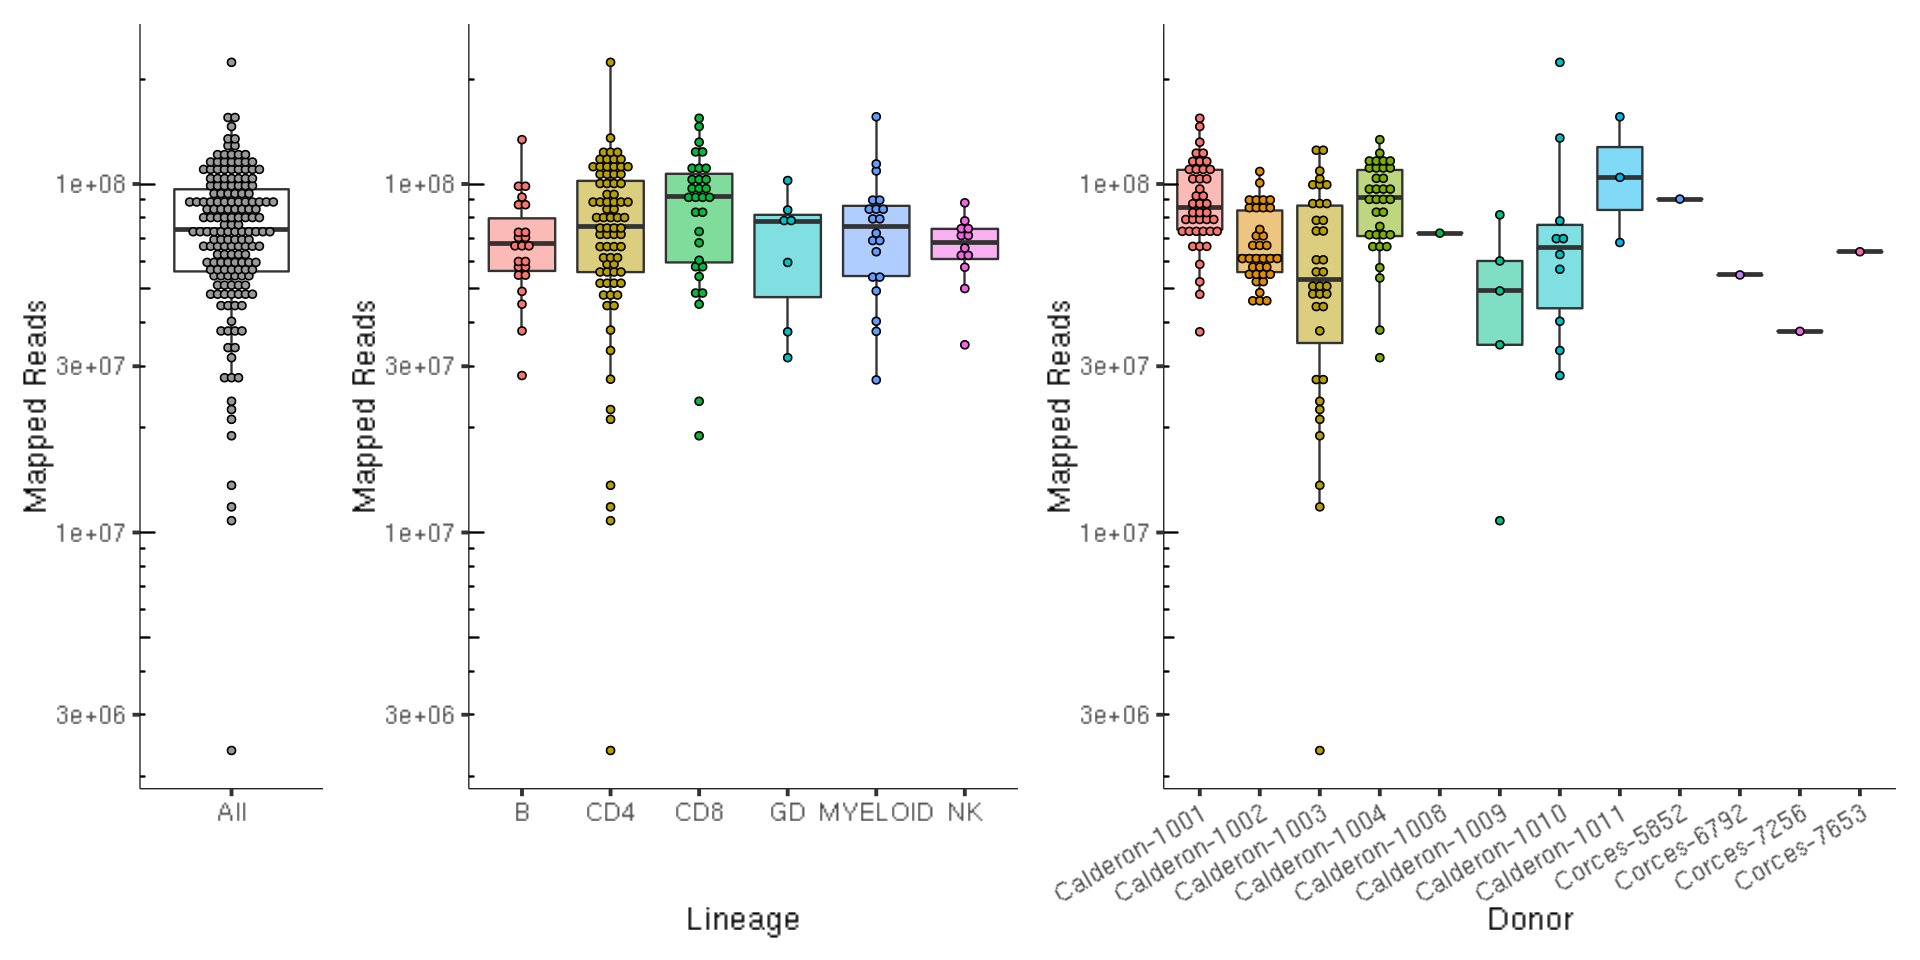

In [9]:
options(repr.plot.width=16, repr.plot.height=8)

p1 <- qc %>%
    ggplot(aes(x="All", y=Mapped.Reads)) +
    geom_boxplot(alpha=0.5) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.02, fill="grey60") +
    scale_y_log10() + annotation_logticks(sides="l") +
    xlab("") + ylab("Mapped Reads") + 
    ggplot_theme

p2 <- qc %>%
    ggplot(aes(x=Lineage, y=Mapped.Reads, fill=Lineage)) +
    geom_boxplot(alpha=0.5) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.02) +
    scale_y_log10() + annotation_logticks(sides="l") +
    xlab("Lineage") + ylab("Mapped Reads") + guides(fill="none") +
    ggplot_theme

p3 <- qc %>%
    dplyr::mutate(Donor=factor(Donor)) %>%
    ggplot(aes(x=Donor, y=Mapped.Reads, fill=Donor)) +
    geom_boxplot(alpha=0.5) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.02) +
    scale_y_log10() + annotation_logticks(sides="l") +
    xlab("Donor") + ylab("Mapped Reads") + guides(fill="none") +
    ggplot_theme +
    theme(axis.text.x=element_text(angle=30, hjust=1))

p1 + p2 + p3 + plot_layout(widths=c(1, 3, 4))

ggsave("03_Functional_Interpretation/results/rna_seq_qc_mapped_reads.svg", width=16, height=8)

In addition to reads mapped, it is also of interest to check the general mapping quality of reads generated. Donor 1002 seems to have generated lower quality reads compared to the rest of the donors. This can likely be corrected by using donor as a batch.

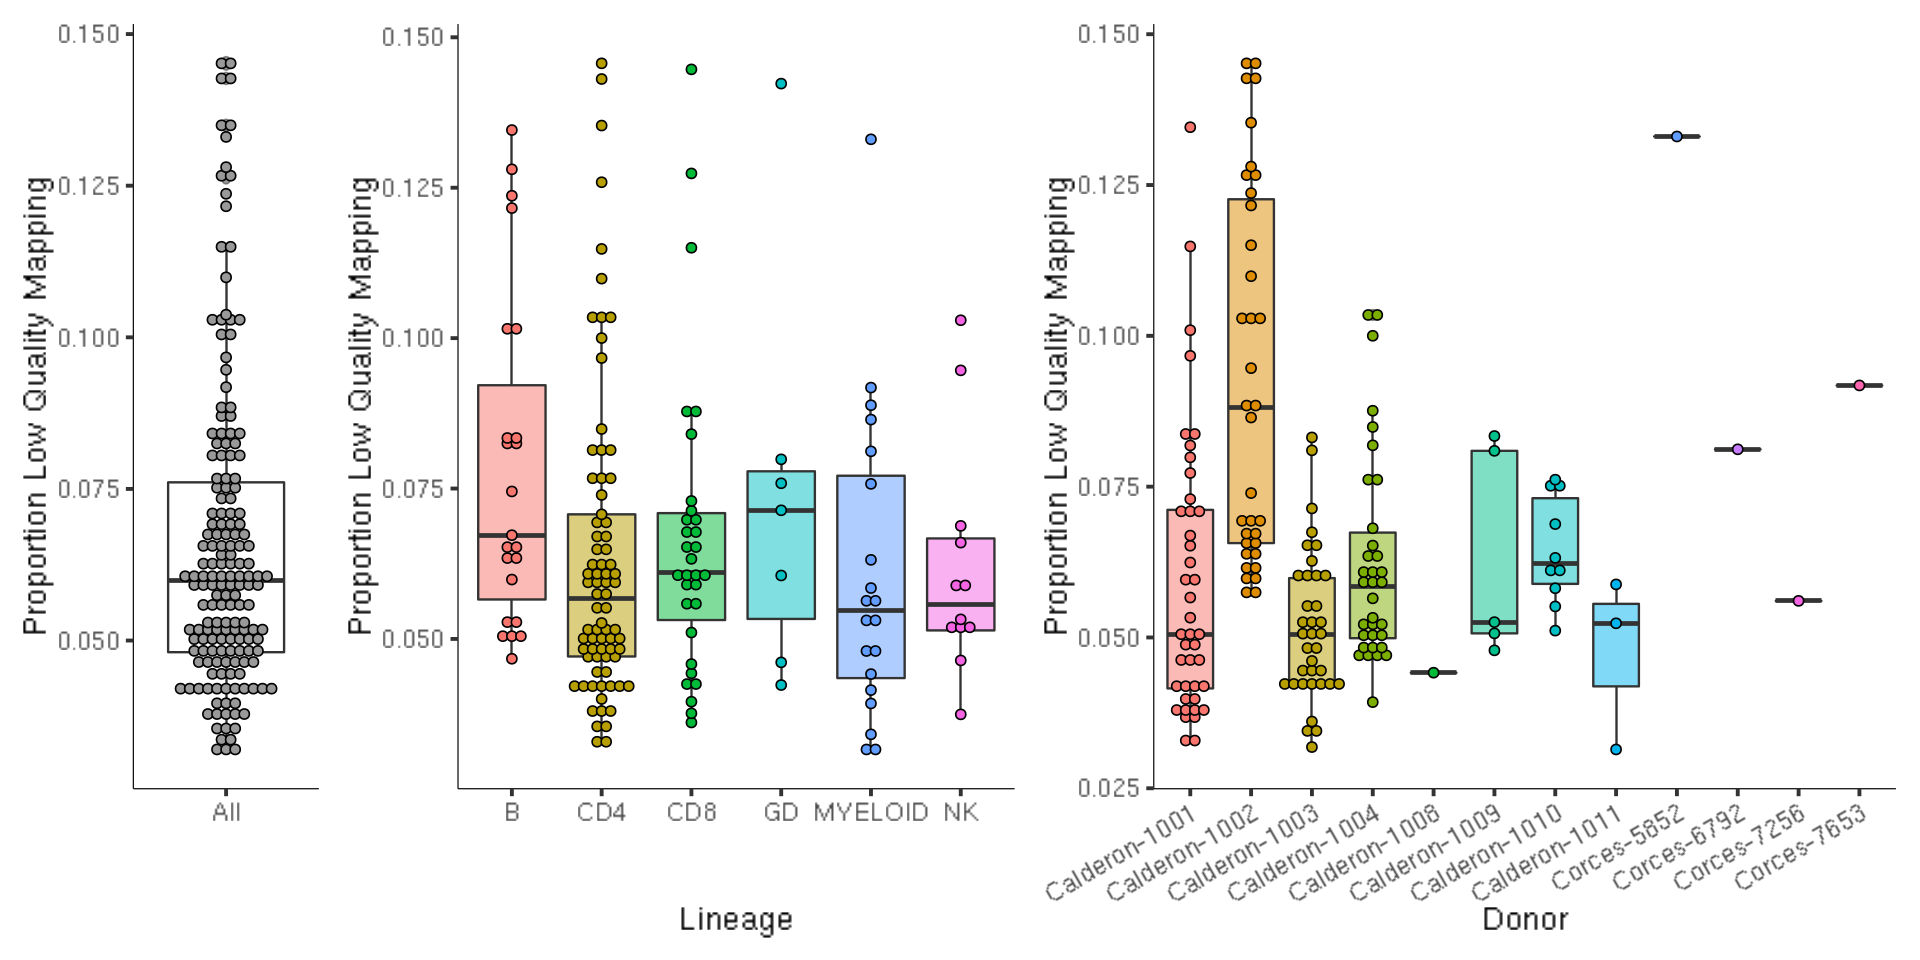

In [10]:
options(repr.plot.width=16, repr.plot.height=8)

p1 <- qc %>%
    dplyr::mutate(Proportion.Low.Mapping=Low.Mapping.Quality / Mapped.Reads) %>%
    ggplot(aes(x="All", y=Proportion.Low.Mapping)) +
    geom_boxplot(alpha=0.5) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.0015, fill="grey60") +
    xlab("") + ylab("Proportion Low Quality Mapping") + 
    ggplot_theme

p2 <- qc %>%
    dplyr::mutate(Proportion.Low.Mapping=Low.Mapping.Quality / Mapped.Reads) %>%
    ggplot(aes(x=Lineage, y=Proportion.Low.Mapping, fill=Lineage)) +
    geom_boxplot(alpha=0.5) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.0015) +
    xlab("Lineage") + ylab("Proportion Low Quality Mapping") + guides(fill="none") +
    ggplot_theme

p3 <- qc %>%
    dplyr::mutate(Proportion.Low.Mapping=Low.Mapping.Quality / Mapped.Reads) %>%
    dplyr::mutate(Donor=factor(Donor)) %>%
    ggplot(aes(x=Donor, y=Proportion.Low.Mapping, fill=Donor)) +
    geom_boxplot(alpha=0.5) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.0015) +
    xlab("Donor") + ylab("Proportion Low Quality Mapping") + guides(fill="none") +
    ggplot_theme +
    theme(axis.text.x=element_text(angle=30, hjust=1))

p1 + p2 + p3 + plot_layout(widths=c(1, 3, 4))

ggsave("03_Functional_Interpretation/results/rna_seq_qc_proportion_low_quality.svg", width=16, height=8)

One observation early on was that many reads mapped to intronic regions. This seems to be the result of samples contributed by Donor 1010.

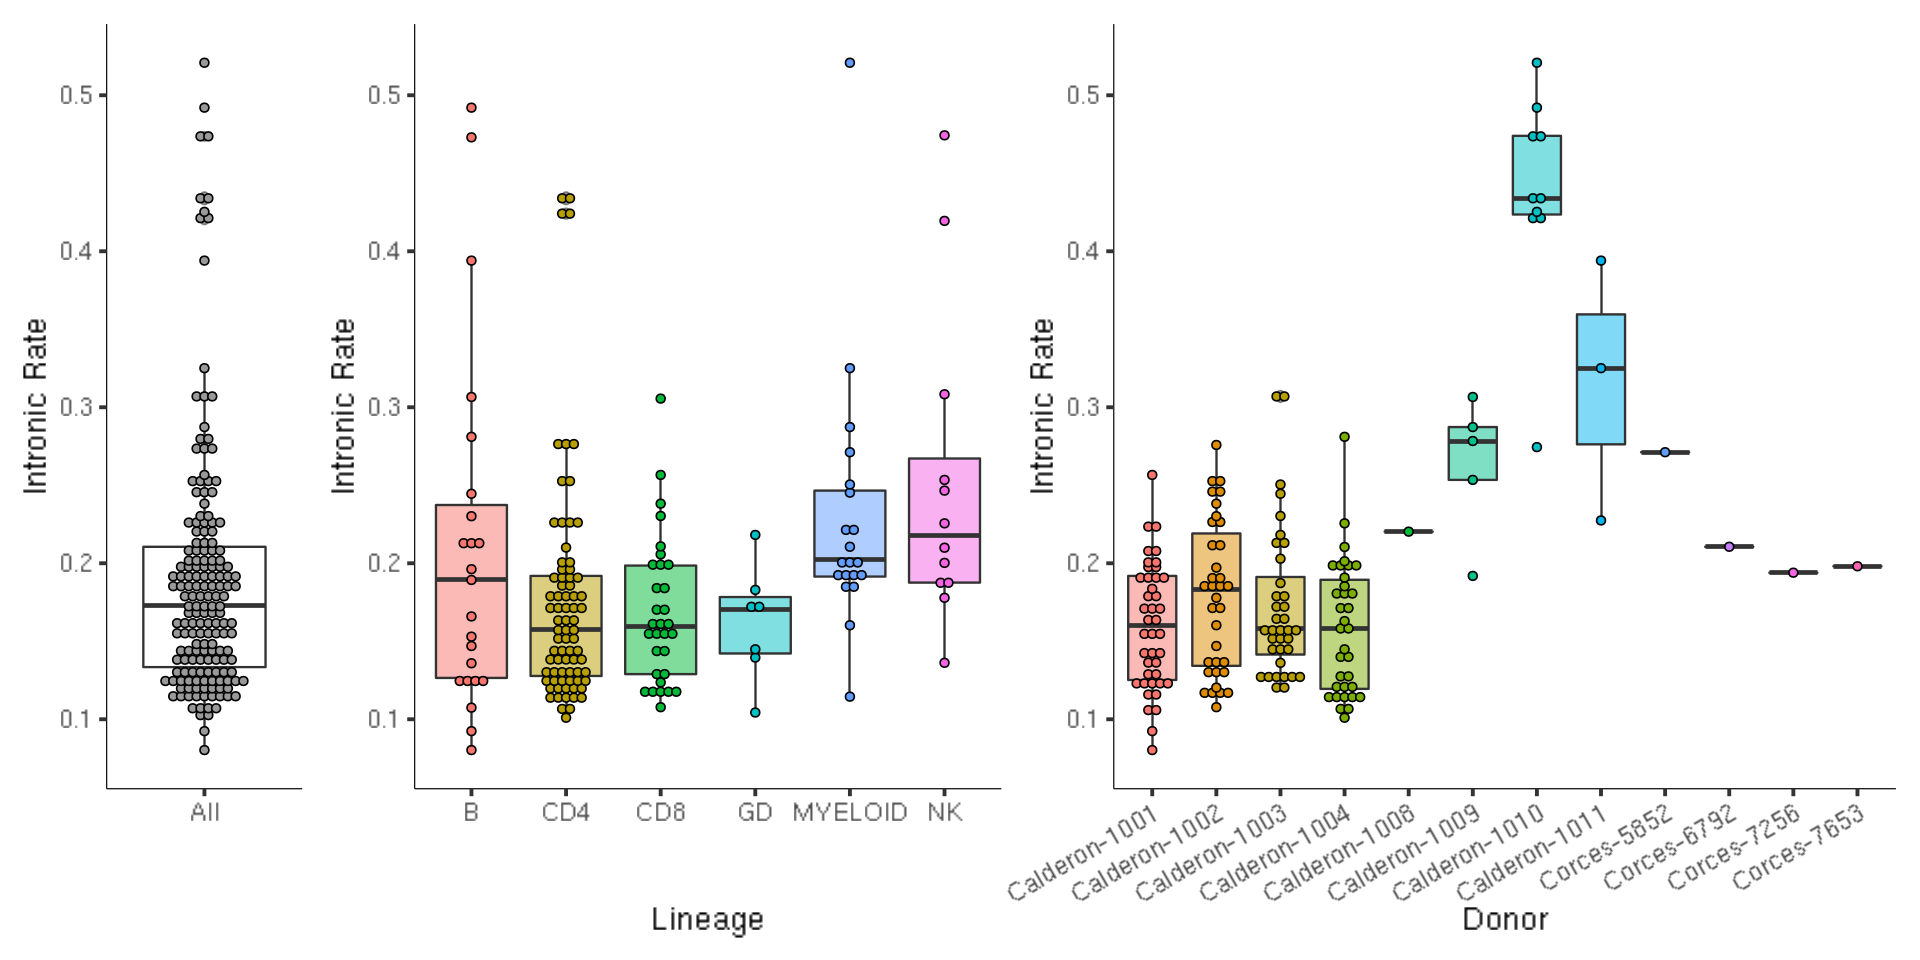

In [13]:
options(repr.plot.width=16, repr.plot.height=8)

p1 <- qc %>%
    ggplot(aes(x="All", y=Intronic.Rate)) +
    geom_boxplot(alpha=0.5) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.005, fill="grey60") +
    xlab("") + ylab("Intronic Rate") + 
    ggplot_theme

p2 <- qc %>%
    ggplot(aes(x=Lineage, y=Intronic.Rate, fill=Lineage)) +
    geom_boxplot(alpha=0.5) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.005) +
    xlab("Lineage") + ylab("Intronic Rate") + guides(fill="none") +
    ggplot_theme

p3 <- qc %>%
    dplyr::mutate(Donor=factor(Donor)) %>%
    ggplot(aes(x=Donor, y=Intronic.Rate, fill=Donor)) +
    geom_boxplot(alpha=0.5) +
    geom_dotplot(binaxis="y", stackdir="center", binwidth=0.005) +
    xlab("Donor") + ylab("Intronic Rate") + guides(fill="none") +
    ggplot_theme +
    theme(axis.text.x=element_text(angle=30, hjust=1))

p1 + p2 + p3 + plot_layout(widths=c(1, 3, 4))

ggsave("03_Functional_Interpretation/results/rna_seq_qc_intronic_rate.svg", width=16, height=8)

The authors of the original study used a HiSeq 4000 and a NovaSeq 6000 to sequence the RNA samples. Donors 1001-1004 were sequenced on the NovaSeq with 100 bp reads. Donors 1008-1011 were sequenced on the HiSeq with 76 bp reads.

In [102]:
table(qc$donor, qc$Instrument)

      
       Illumina HiSeq 4000 Illumina NovaSeq 6000
  1001                   0                    42
  1002                   0                    35
  1003                   0                    36
  1004                   0                    34
  1008                   1                     0
  1009                   5                     0
  1010                  10                     0
  1011                   3                     0